In [1]:
res_path = "C:\\Users\\Geoffroy Leconte\\Documents\\doctorat\\code\\docGL\\amdahl_benchmarks\\results"
using DataFrames, SolverBenchmark, SolverTools, JLD2, Plots

function open_file(path)
    file = jldopen(path, "r")
    df_out = file["stats"]
    close(file)
    return df_out
end

open_file (generic function with 1 method)

In [13]:
rip_mono = open_file(string(res_path, "\\G-2021-03_lp_mono.jld2"));

rip_mono1 = open_file(string(res_path, "\\ripqp_mono_1_lp.jld2"));
rip_mono_nrtol1 = open_file(string(res_path, "\\ripqp_mono_nrtol_1_lp.jld2"));
rip_mono_d1 = open_file(string(res_path, "\\ripqp_dynamic_1_lp.jld2"));
rip_mono_c1 = open_file(string(res_path, "\\ripqp_ccorr_1_lp.jld2"));
rip_multi1 = open_file(string(res_path, "\\ripqp_multi_1_lp.jld2"));
rip_multi_d1 = open_file(string(res_path, "\\ripqp_multi_dynamic_1_lp.jld2"));

# K2_5
rip_monoK251 = open_file(string(res_path, "\\ripqp_mono_K25_1_lp.jld2"));
rip_mono_dK251 = open_file(string(res_path, "\\ripqp_dynamic_K25_1_lp.jld2"));
rip_multiK251 = open_file(string(res_path, "\\ripqp_multi_K25_1_lp.jld2"));
rip_multi_dK251 = open_file(string(res_path, "\\ripqp_multi_dynamic_K25_1_lp.jld2"));

# K2_5 one step
rip_monoosK251 = open_file(string(res_path, "\\ripqp_mono_osK25_1_lp.jld2")); # r, γ =  T(0.999), T(0.05)
rip_monoosK252 = open_file(string(res_path, "\\ripqp_mono_osK25_2_lp.jld2")); # r, γ =  T(0.95), T(0.1)

# comparisons zoom1
rip_monoK2 = open_file(string(res_path, "\\ripqp_mono_K2_lp.jld2"));
rip_mono_z = open_file(string(res_path, "\\ripqp_mono_z_lp.jld2")); # ϵ_rbz = 1e-5
rip_mono_z2 = open_file(string(res_path, "\\ripqp_mono_z2_lp.jld2")); # ϵ_rbz = 1e-7
rip_multi_z = open_file(string(res_path, "\\ripqp_multi_z_lp.jld2")); 
rip_multi_z2 = open_file(string(res_path, "\\ripqp_multi_z2_lp.jld2")); # ϵ_pdd32 = 1.0 
rip_multiK2 = open_file(string(res_path, "\\ripqp_multi_K2_lp.jld2"));

In [9]:
stats_lp = Dict(
#                 :ripqp_mono        => rip_mono,
#                 :ripqp_mono1       => rip_mono1,
                # :ripqp_mono_nrtol1 => rip_mono_nrtol1,
#                 :ripqp_mono_d1   => rip_mono_d1,
                # :ripqp_mono_c1   => rip_mono_c1,
#                 :rip_monoK251    => rip_monoK251,
#                 :rip_mono_dK251  => rip_mono_dK251,
#                   :rip_monoK2      => rip_monoK2,
                  :rip_mono_z      => rip_mono_z,
                  :rip_mono_z2      => rip_mono_z2,
                   )

Dict{Symbol,DataFrame} with 2 entries:
  :rip_mono_z  => 87×31 DataFrame. Omitted printing of 24 columns…
  :rip_mono_z2 => 87×31 DataFrame. Omitted printing of 24 columns…

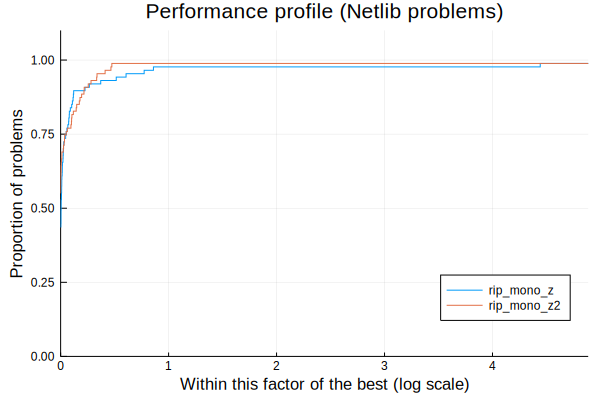

In [10]:
perf = performance_profile(stats_lp, df->df.elapsed_time)
plot!(perf, legend=:bottomright)
title!("Performance profile (Netlib problems)")

In [5]:
rip_mono1bis = copy(rip_mono1);
rip_mono1bis.iter .*= 2;

stats_it = Dict(
                :rip_mono1bis   => rip_mono1bis,
                :rip_monoosK251 => rip_monoosK251,
                :rip_monoosK252 => rip_monoosK252,
                )

Dict{Symbol,DataFrame} with 2 entries:
  :rip_mono1bis   => 87×31 DataFrame. Omitted printing of 24 columns…
  :rip_monoosK251 => 87×31 DataFrame. Omitted printing of 24 columns…

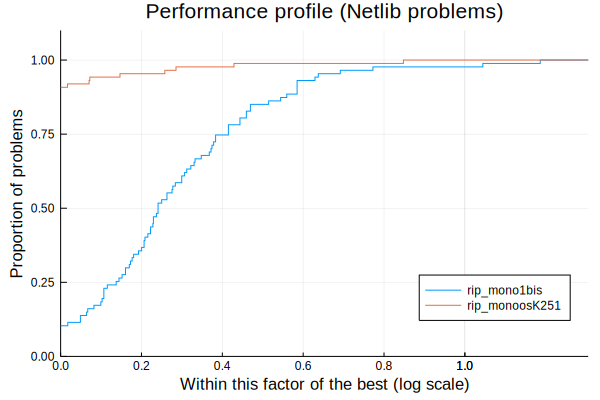

In [6]:
perf2 = performance_profile(stats_it, df->df.iter)
plot!(perf2, legend=:bottomright)
title!("Performance profile (Netlib problems)")

In [29]:
# stats multi
stats_lp = Dict(
                :rip_multiK2      => rip_multiK2,
                :rip_multi_z      => rip_multi_z,
#                 :rip_multi_z2      => rip_multi_z2,
               )

Dict{Symbol,DataFrame} with 2 entries:
  :rip_multiK2 => 87×31 DataFrame. Omitted printing of 24 columns…
  :rip_multi_z => 87×31 DataFrame. Omitted printing of 24 columns…

┌ Warning: some measures are zero; shifting all by one
└ @ BenchmarkProfiles C:\Users\Geoffroy Leconte\.julia\packages\BenchmarkProfiles\xB4CX\src\performance_profiles.jl:15


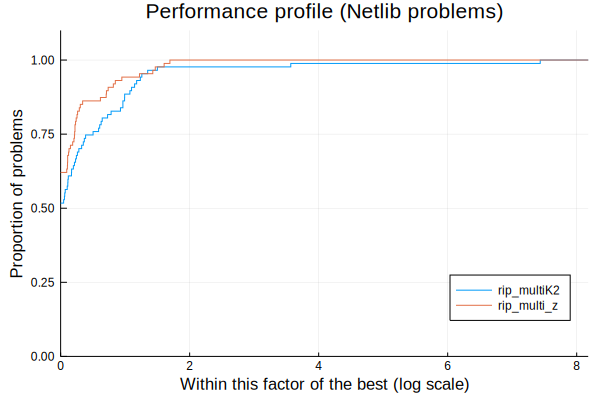

In [30]:
perf = performance_profile(stats_lp, df->df.iter)
plot!(perf, legend=:bottomright)
title!("Performance profile (Netlib problems)")

In [26]:
withenv("COLUMNS" => 400, "LINES" => 200) do
    display(rip_multi_z)
end

,id,name,nvar,ncon,nequ,status,objective,elapsed_time,iter,dual_feas,primal_feas,neval_obj,neval_grad,neval_cons,neval_jcon,neval_jgrad,neval_jac,neval_jprod,neval_jtprod,neval_hess,neval_hprod,neval_jhprod,neval_residual,neval_jac_residual,neval_jprod_residual,neval_jtprod_residual,neval_hess_residual,neval_jhess_residual,neval_hprod_residual,extrainfo
,Int64,String,Int64,Int64,Int64,Symbol,Float64,Float64,Int64,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String
1,1,25FV47,1571,821,0,acceptable,5501.85,10.3011,65,1.66457e-10,3.31352e-9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
2,2,ADLITTLE,97,56,0,acceptable,225495.0,0.00259781,49,1.65528e-10,4.74074e-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
3,3,AFIRO,32,27,0,acceptable,-464.753,0.000641108,18,2.44963e-11,4.38933e-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
4,4,AGG,163,488,0,acceptable,-3.59918e7,0.046211,101,6.34464e-9,2.51307e-8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
5,5,AGG2,302,516,0,acceptable,-2.02393e7,0.142804,80,1.35477e-7,2.56953e-7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
6,6,AGG3,302,516,0,acceptable,1.03121e7,0.120425,75,1.64255e-8,1.32146e-7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
7,7,BANDM,472,305,0,acceptable,-158.628,0.0126052,36,4.97094e-10,1.40037e-9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
8,8,BEACONFD,262,173,0,acceptable,33592.5,0.0107529,45,2.40014e-8,6.51926e-7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
9,9,BLEND,83,74,0,acceptable,-30.8121,0.00227404,27,2.42138e-11,5.65938e-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
